In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [45]:
# 2) Load the dataset
data = pd.read_csv('D://Smartbridge - DS//Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


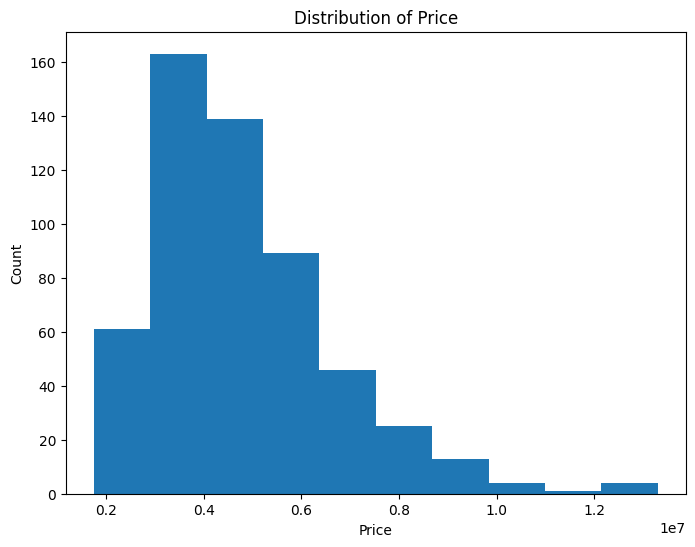

In [46]:
# 3. Perform Below Visualizations.
# a) Univariate Analysis
    
# Histogram for Price
plt.figure(figsize=(8, 6))
plt.hist(data['price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

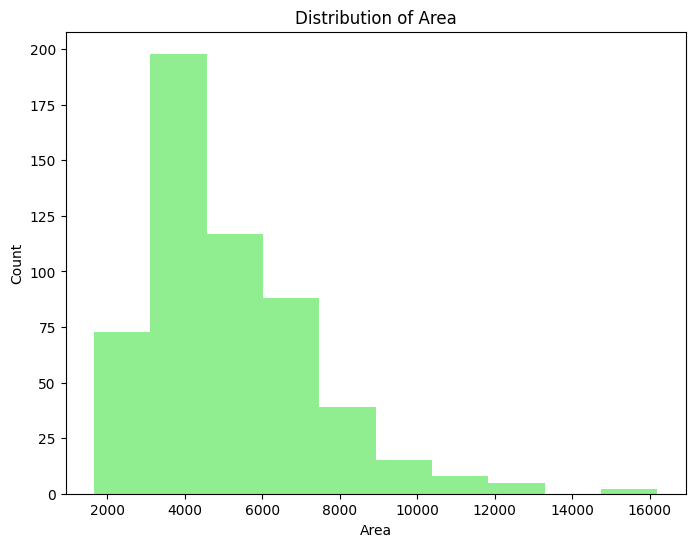

In [47]:
# a) Univariate Analysis

# Histogram for Area
plt.figure(figsize=(8, 6))
plt.hist(data['area'], bins=10, color='lightgreen')
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Distribution of Area')
plt.show()

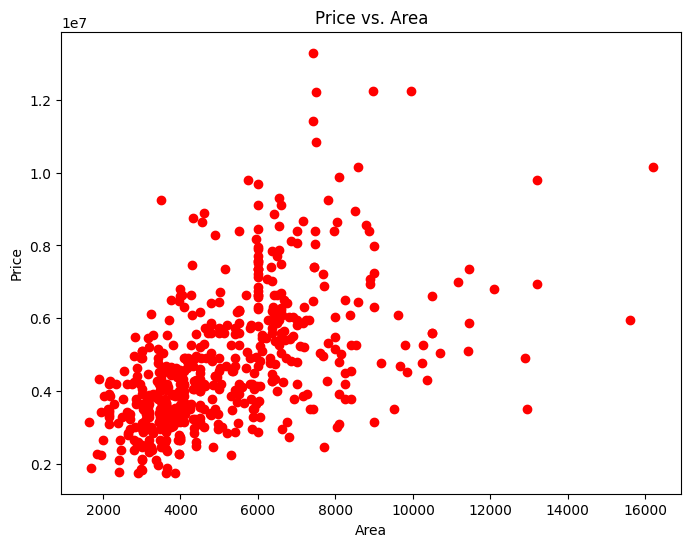

In [48]:
# 3. Perform Below Visualizations.
# b) Bi-Variate Analysis

# Scatter plot for Price vs. Area
plt.figure(figsize=(8, 6))
plt.scatter(data['area'], data['price'], color = "red")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs. Area')
plt.show()

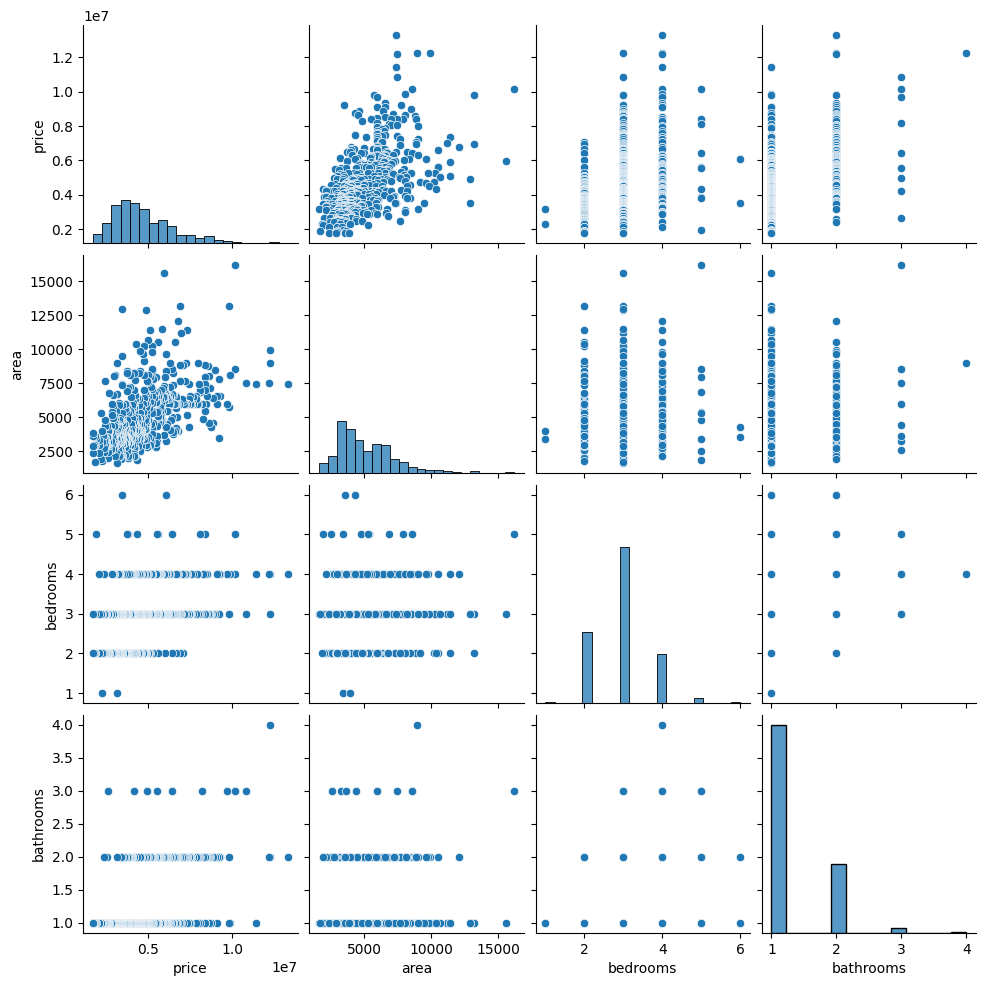

In [49]:
# 3. Perform Below Visualizations.
# c) Multi-Variate Analysis
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms']])
plt.show()

In [50]:
# 4. Perform descriptive statistics on the dataset.
df = pd.DataFrame(data)
descriptive_stats = df.describe()
descriptive_stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [51]:
# 5. Check for Missing values and deal with them.
missing_values = df.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [52]:
# 6. Find the outliers and replace them outliers

for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,9205000.0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,furnished
1,9205000.0,8960.0,4.0,3.5,3.5,yes,no,no,no,yes,2.5,furnished
2,9205000.0,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,semi-furnished
3,9205000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,2.5,furnished
4,9205000.0,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,yes,no,yes,no,no,2.0,unfurnished
541,1767150.0,2400.0,3.0,1.0,1.0,no,no,no,no,no,0.0,semi-furnished
542,1750000.0,3620.0,2.0,1.0,1.0,yes,no,no,no,no,0.0,unfurnished
543,1750000.0,2910.0,3.0,1.0,1.0,no,no,no,no,no,0.0,furnished


In [53]:
# 7. Check for Categorical columns and perform encoding.
categorical_cols = df.select_dtypes(include='object').columns #categorical columns
for column in categorical_cols:
    encoded_column = pd.get_dummies(df[column])  # One-hot encoding
    df = pd.concat([df, encoded_column], axis=1)
    df.drop(column, axis=1, inplace=True)
df

,price,area,bedrooms,bathrooms,stories,parking,no,yes,no,yes,no,yes,no,yes,no,yes,furnished,semi-furnished,unfurnished
0,9205000.0,7420.0,4.0,2.0,3.0,2.0,0,1,1,0,1,0,1,0,0,1,1,0,0
1,9205000.0,8960.0,4.0,3.5,3.5,2.5,0,1,1,0,1,0,1,0,0,1,1,0,0
2,9205000.0,9960.0,3.0,2.0,2.0,2.0,0,1,1,0,0,1,1,0,1,0,0,1,0
3,9205000.0,7500.0,4.0,2.0,2.0,2.5,0,1,1,0,0,1,1,0,0,1,1,0,0
4,9205000.0,7420.0,4.0,1.0,2.0,2.0,0,1,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,2.0,0,1,1,0,0,1,1,0,1,0,0,0,1
541,1767150.0,2400.0,3.0,1.0,1.0,0.0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000.0,3620.0,2.0,1.0,1.0,0.0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,1750000.0,2910.0,3.0,1.0,1.0,0.0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [54]:
# 8. Split the data into dependent and independent variables.
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable

# Print the independent variables
print("Independent variables:\n", X)

# Print the dependent variable
print("\nDependent variable\n", y)


Independent variables:
        area  bedrooms  bathrooms  stories  parking  no  yes  no  yes  no  yes  \
0    7420.0       4.0        2.0      3.0      2.0   0    1   1    0   1    0   
1    8960.0       4.0        3.5      3.5      2.5   0    1   1    0   1    0   
2    9960.0       3.0        2.0      2.0      2.0   0    1   1    0   0    1   
3    7500.0       4.0        2.0      2.0      2.5   0    1   1    0   0    1   
4    7420.0       4.0        1.0      2.0      2.0   0    1   0    1   0    1   
..      ...       ...        ...      ...      ...  ..  ...  ..  ...  ..  ...   
540  3000.0       2.0        1.0      1.0      2.0   0    1   1    0   0    1   
541  2400.0       3.0        1.0      1.0      0.0   1    0   1    0   1    0   
542  3620.0       2.0        1.0      1.0      0.0   0    1   1    0   1    0   
543  2910.0       3.0        1.0      1.0      0.0   1    0   1    0   1    0   
544  3850.0       3.0        1.0      2.0      0.0   0    1   1    0   1    0   

   

In [55]:
#9. Scale the independent variables

X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled

,area,bedrooms,bathrooms,stories,parking,no,yes,no,yes,no,yes,no,yes,no,yes,furnished,semi-furnished,unfurnished
0,1.156583,1.506093,1.436585,1.586075,1.579640,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,1.700840,-0.844888,-0.696429
1,1.925060,1.506093,4.451753,2.229717,2.179156,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,-1.472618,1.472618,1.700840,-0.844888,-0.696429
2,2.424072,0.071092,1.436585,0.298791,1.579640,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-0.587945,1.183588,-0.696429
3,1.196504,1.506093,1.436585,0.298791,2.179156,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,1.700840,-0.844888,-0.696429
4,1.156583,1.506093,-0.573527,0.298791,1.579640,-0.405623,0.405623,-2.149083,2.149083,-1.361397,1.361397,0.219265,-0.219265,-1.472618,1.472618,1.700840,-0.844888,-0.696429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.049046,-1.363909,-0.573527,-0.988492,1.579640,-0.405623,0.405623,0.465315,-0.465315,-1.361397,1.361397,0.219265,-0.219265,0.679063,-0.679063,-0.587945,-0.844888,1.435896
541,-1.348453,0.071092,-0.573527,-0.988492,-0.818421,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,-0.587945,1.183588,-0.696429
542,-0.739659,-1.363909,-0.573527,-0.988492,-0.818421,-0.405623,0.405623,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,-0.587945,-0.844888,1.435896
543,-1.093957,0.071092,-0.573527,-0.988492,-0.818421,2.465344,-2.465344,0.465315,-0.465315,0.734539,-0.734539,0.219265,-0.219265,0.679063,-0.679063,1.700840,-0.844888,-0.696429


In [56]:
#10. Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 18)
X_test shape: (109, 18)
y_train shape: (436,)
y_test shape: (109,)


In [57]:
#11. Build the Model
model = LinearRegression()

In [58]:
#12. Train the Model
model.fit(X_train, y_train)

LinearRegression()

In [59]:
#13. Test the Model
y_pred = model.predict(X_test)

In [60]:
#14. Measure the performance using Metrics.
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1311668902931.2998
Root Mean Squared Error (RMSE): 1145281.1458027675
Mean Absolute Error (MAE): 905372.0164861163
R-squared (R2) Score: 0.6753207900398699
